## Exercise 2
In the course you learned how to do classification using Fashion MNIST, a data set containing items of clothing. There's another, similar dataset called MNIST which has items of handwriting -- the digits 0 through 9.

Write an MNIST classifier that trains to 99% accuracy or above, and does it without a fixed number of epochs -- i.e. you should stop training once you reach that level of accuracy.

Some notes:
1. It should succeed in less than 10 epochs, so it is okay to change epochs to 10, but nothing larger
2. When it reaches 99% or greater it should print out the string "Reached 99% accuracy so cancelling training!"
3. If you add any additional variables, make sure you use the same names as the ones used in the class

I've started the code for you below -- how would you finish it? 

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

class myCallBack(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get('loss')<=0.01):
      print("\Reached 99% accuracy so canceling the training!")
      self.model.stop_training = True

callbacks = myCallBack()
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()

class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']

print("train_images",x_train.shape,"test_images",x_test.shape)
print(len(y_train))
print("train_labels","test_labels",y_train,y_test)

train_images (60000, 28, 28) test_images (10000, 28, 28)
60000
train_labels test_labels [5 0 4 ... 5 6 8] [7 2 1 ... 4 5 6]


#**Preprocess the data**
The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

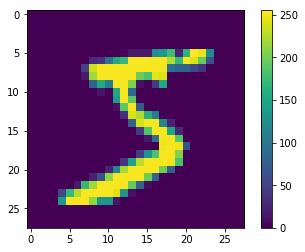

In [2]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

#print(y_train[0])
#print(x_train[0])

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the training set and the testing set be preprocessed in the same way:

In [0]:
#Normalization 
x_train = x_train/255.0
x_test = x_test/255.0

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the training set and display the class name below each image.

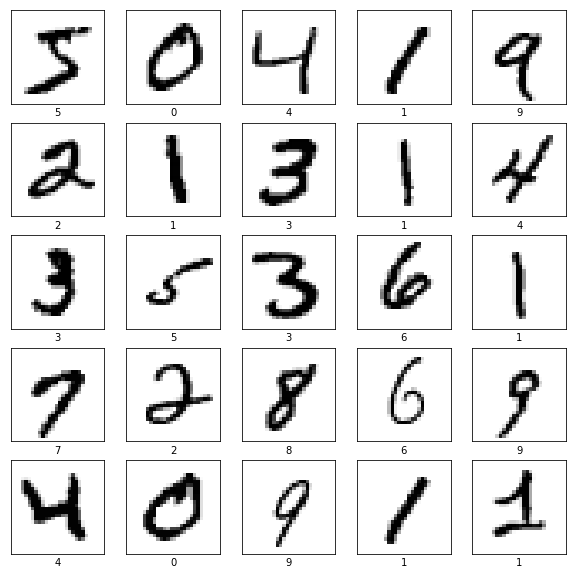

In [4]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()


# Build the model
Building the neural network requires configuring the layers of the model, then compiling the model.

##Set up the layers

The basic building block of a neural network is the layer. Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as tf.keras.layers.Dense, have parameters that are learned during training.

The first layer in this network, tf.keras.layers.Flatten, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two tf.keras.layers.Dense layers. These are densely connected, or fully connected, neural layers. The first Dense layer has 128 nodes (or neurons). The second (and last) layer is a 10-node softmax layer that returns an array of 10 probability scores that sum to 1. Each node contains a score that indicates the probability that the current image belongs to one of the 10 classes.

In [5]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28)),
                                    tf.keras.layers.Dense(256,activation=tf.nn.relu6),
                                    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])

W0817 17:29:06.669293 140480034076544 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


#Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

    *Loss function —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
    *Optimizer —This is how the model is updated based on the data it sees and its loss function.
    *Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.


In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#Train the model

Training the neural network model requires the following steps:

    Feed the training data to the model. In this example, the training data is in the train_images and train_labels arrays.
    The model learns to associate images and labels.
    You ask the model to make predictions about a test set—in this example, the test_images array. Verify that the predictions match the labels from the test_labels array.

To start training, call the model.fit method—so called because it "fits" the model to the training data:

In [7]:
model.fit(x_train,y_train,epochs=10,callbacks=[callbacks])

Epoch 1/10
60000/60000 [==============================] - 8s 129us/sample - loss: 0.2197 - acc: 0.9364
Epoch 2/10
60000/60000 [==============================] - 7s 111us/sample - loss: 0.0913 - acc: 0.9724
Epoch 3/10
60000/60000 [==============================] - 7s 111us/sample - loss: 0.0614 - acc: 0.9809
Epoch 4/10
60000/60000 [==============================] - 7s 111us/sample - loss: 0.0440 - acc: 0.9865
Epoch 5/10
60000/60000 [==============================] - 7s 111us/sample - loss: 0.0316 - acc: 0.9904
Epoch 6/10
60000/60000 [==============================] - 7s 111us/sample - loss: 0.0257 - acc: 0.9914
Epoch 7/10
60000/60000 [==============================] - 7s 112us/sample - loss: 0.0195 - acc: 0.9940
Epoch 8/10
60000/60000 [==============================] - 7s 111us/sample - loss: 0.0162 - acc: 0.9946
Epoch 9/10
60000/60000 [==============================] - 7s 116us/sample - loss: 0.0128 - acc: 0.9961
Epoch 10/10
60000/60000 [==============================] - 7s 113us/sampl

As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.9965 (or 99%) on the training data with loss rate 0.0104.

#Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [8]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 50us/sample - loss: 0.0744 - acc: 0.9813


[0.07444279951002754, 0.9813]

It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents overfitting. Overfitting is when a machine learning model performs worse on new, previously unseen inputs than on the training data.

#Make predictions

With the model trained, you can use it to make predictions about some images.

In [0]:
predictions = model.predict(x_test)

Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [14]:
print(predictions[9])

[2.48658248e-16 1.16068040e-18 1.06577596e-16 5.61111921e-12
 4.76671703e-04 2.61169565e-14 4.87769117e-17 5.71592636e-06
 3.89023036e-09 9.99517560e-01]


A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of Number. You can see which label has the highest confidence value:

In [16]:
np.argmax(predictions[9])
print(y_test[9])

9


#Graph this to look at the full set of 10 class predictions.


In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

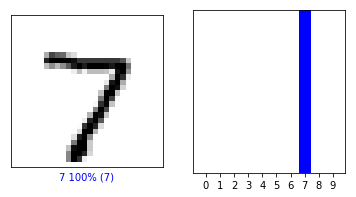

In [18]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()


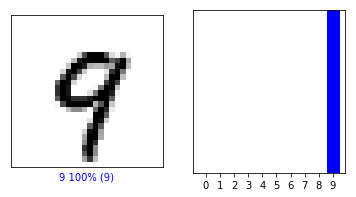

In [19]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()


Let's plot several images with their predictions. Note that the model can be wrong even when very confident.

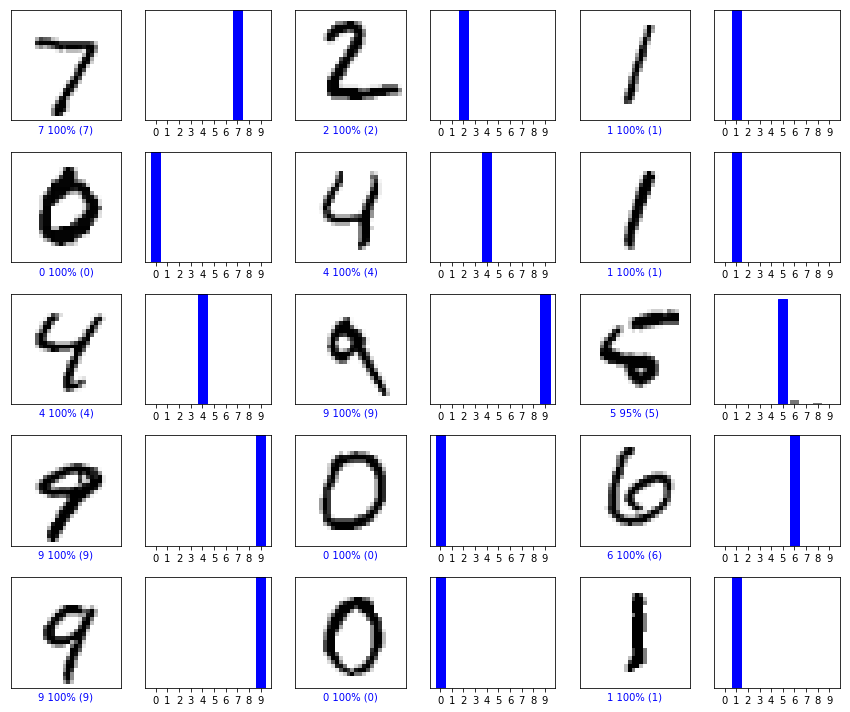

In [21]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()


Finally, use the trained model to make a prediction about a single image.

In [22]:
# Grab an image from the test dataset.
img = x_test[1]

print(img.shape)


(28, 28)


tf.keras models are optimized to make predictions on a batch, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

In [23]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)


(1, 28, 28)


Now predict the correct label for this image:

[[9.8225424e-14 2.5533600e-08 1.0000000e+00 9.0437275e-09 9.4528968e-18
  3.1682817e-10 2.6694137e-12 2.7250291e-16 3.9191841e-10 3.0046710e-19]]


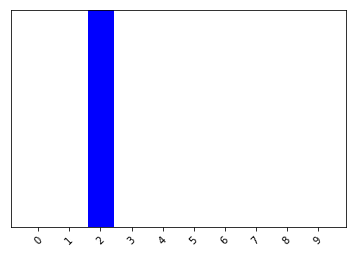

In [24]:
predictions_single = model.predict(img)

print(predictions_single)

plot_value_array(1, predictions_single[0], y_test)
_ = plt.xticks(range(10), class_names, rotation=45)


model.predict returns a list of lists—one list for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [25]:
np.argmax(predictions_single[0])

2

And the model predicts a label of 2.